In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 # Preproc for train dataset

In [0]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle


file_list = []
class_list = []

DATADIR = "/content/drive/My Drive/SMNI_CMI_TRAIN_unzipped/SMNI_CNN/Images/train"

# All the categories you want your neural network to detect
CATEGORIES = ["alcoholic", "control"]

# The size of the images that your neural network will use
IMG_SIZE = 50

# Checking or all images in the data folder
for category in CATEGORIES :
	path = os.path.join(DATADIR, category)
	for img in os.listdir(path):
		img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

training_data = []

def create_training_data():
	for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
				training_data.append([new_array, class_num])
			except Exception as e:
				pass

create_training_data()

random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
	X.append(features)
	y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Creating the files containing all the information about your model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

# Preproc for test dataset

In [0]:
DATADIR = "/content/drive/My Drive/SMNI_CMI_TRAIN_unzipped/SMNI_CNN/Images/val"

# All the categories you want your neural network to detect
CATEGORIES = ["alcoholic", "control"]

# The size of the images that your neural network will use
IMG_SIZE = 50

# Checking or all images in the data folder
for category in CATEGORIES :
	path = os.path.join(DATADIR, category)
	for img in os.listdir(path):
		img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

testing_data = []

def create_testing_data():
	for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
				testing_data.append([new_array, class_num])
			except Exception as e:
				pass

create_testing_data()

X_test = [] #features
y_test = [] #labels

for features, label in testing_data:
	X_test.append(features)
	y_test.append(label)

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Creating the files containing all the information about your model
pickle_out = open("X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

pickle_in = open("X_test.pickle", "rb")
X_test = pickle.load(pickle_in)

# Basic CNN

Train on 360 samples, validate on 40 samples
Epoch 1/20
360/360 [==============================] - 2s 5ms/sample - loss: 0.6935 - acc: 0.5028 - val_loss: 0.7753 - val_acc: 0.4500
Epoch 2/20
360/360 [==============================] - 0s 153us/sample - loss: 0.7126 - acc: 0.5056 - val_loss: 0.6885 - val_acc: 0.5500
Epoch 3/20
360/360 [==============================] - 0s 150us/sample - loss: 0.6933 - acc: 0.4889 - val_loss: 0.6923 - val_acc: 0.5500
Epoch 4/20
360/360 [==============================] - 0s 157us/sample - loss: 0.6926 - acc: 0.5250 - val_loss: 0.6912 - val_acc: 0.4750
Epoch 5/20
360/360 [==============================] - 0s 158us/sample - loss: 0.6905 - acc: 0.5417 - val_loss: 0.6938 - val_acc: 0.4500
Epoch 6/20
360/360 [==============================] - 0s 161us/sample - loss: 0.6938 - acc: 0.4778 - val_loss: 0.6897 - val_acc: 0.4750
Epoch 7/20
360/360 [==============================] - 0s 154us/sample - loss: 0.6865 - acc: 0.5750 - val_loss: 0.6822 - val_acc: 0.5750
Epoch

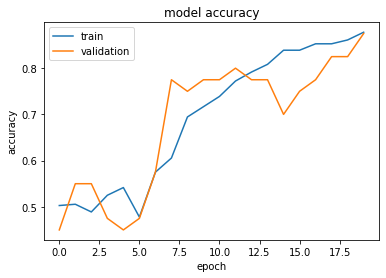

In [120]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
X = X/255.0

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 13 neurons, for 13 classes
model.add(Dense(2))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=32, epochs=20, validation_split=0.1)

# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [121]:
from sklearn.metrics import classification_report

# Opening the files about data
X_test = pickle.load(open("X_test.pickle", "rb"))
y_test = pickle.load(open("y_test.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
X_test = X_test/255.0

y_pred = model.predict(X_test, batch_size=48, verbose=1)
y_pred_bool = []
for i in y_pred:
  if i[0] > i[1]:
    y_pred_bool.append(0)
  else :
    y_pred_bool.append(1)

print(classification_report(y_test, y_pred_bool))

200/200 [==============================] - 1s 3ms/sample
              precision    recall  f1-score   support

           0       0.96      0.77      0.86       100
           1       0.81      0.97      0.88       100

    accuracy                           0.87       200
   macro avg       0.89      0.87      0.87       200
weighted avg       0.89      0.87      0.87       200



# Resnet

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2
#from resnets_utils import *

from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

In [227]:
# Normalize image vectors
from keras.utils import to_categorical

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))
# X_test = pickle.load(open("X_test.pickle", "rb"))
# y_test = pickle.load(open("y_test.pickle", "rb"))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert training and test labels to one hot matrices
Y_train = to_categorical(y_train, 2)
Y_test = to_categorical(y_test, 2)

# datagen = ImageDataGenerator(
#         rotation_range=10,
#         zoom_range = 0.1,
#         width_shift_range=0.1,
#         height_shift_range=0.1)

# datagen.fit(X_train)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 360
number of test examples = 40
X_train shape: (360, 50, 50, 1)
Y_train shape: (360, 2)
X_test shape: (40, 50, 50, 1)
Y_test shape: (40, 2)


In [228]:
img_height,img_width = 50,50 
num_classes = 2
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (img_height,img_width,1))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [0]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [231]:
resnet_history = model.fit(X_train, Y_train, epochs = 10, batch_size = 32, validation_split=0.1)

Train on 324 samples, validate on 36 samples
Epoch 1/10
324/324 [==============================] - 40s 123ms/step - loss: 1.8787 - acc: 0.5309 - val_loss: 0.8404 - val_acc: 0.4444
Epoch 2/10
324/324 [==============================] - 1s 3ms/step - loss: 1.4312 - acc: 0.5278 - val_loss: 0.6287 - val_acc: 0.7222
Epoch 3/10
324/324 [==============================] - 1s 3ms/step - loss: 1.1541 - acc: 0.5617 - val_loss: 0.7772 - val_acc: 0.5000
Epoch 4/10
324/324 [==============================] - 1s 3ms/step - loss: 1.0005 - acc: 0.6543 - val_loss: 0.7858 - val_acc: 0.6111
Epoch 5/10
324/324 [==============================] - 1s 3ms/step - loss: 0.9047 - acc: 0.6883 - val_loss: 0.8639 - val_acc: 0.5556
Epoch 6/10
324/324 [==============================] - 1s 3ms/step - loss: 0.7546 - acc: 0.7377 - val_loss: 0.9583 - val_acc: 0.5278
Epoch 7/10
324/324 [==============================] - 1s 3ms/step - loss: 0.5717 - acc: 0.7932 - val_loss: 0.3829 - val_acc: 0.8056
Epoch 8/10
324/324 [========

In [232]:
preds = model.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

40/40 [==============================] - 0s 1ms/step
Loss = 0.9271838665008545
Test Accuracy = 0.725


In [233]:
from sklearn.metrics import classification_report

# Opening the files about data
# X_test = pickle.load(open("X_test.pickle", "rb"))
# y_test = pickle.load(open("y_test.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
# X_test = X_test/255.0

y_pred = model.predict(X_test)
y_pred_bool = []
for i in y_pred:
  if i[0] > i[1]:
    y_pred_bool.append(0)
  else :
    y_pred_bool.append(1)

print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.75      0.53      0.62        17
           1       0.71      0.87      0.78        23

    accuracy                           0.73        40
   macro avg       0.73      0.70      0.70        40
weighted avg       0.73      0.72      0.71        40



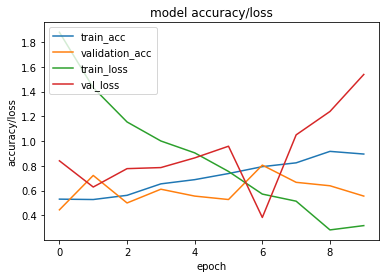

In [234]:
plt.figure(1)
plt.plot(resnet_history.history['acc'])
plt.plot(resnet_history.history['val_acc'])
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('model accuracy/loss')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['train_acc', 'validation_acc','train_loss', 'val_loss'], loc='upper left')

# 5-layer CNN

As you can see, the ResNEt model doesn't work well on our dataset since the size is very less. It tends to overfit on ResNet. And initially, using the basic 3-CNN model, we were able to get a well-performing model. Therefore, we'll extend it to a 5 layer model now and see how it performs.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam

In [201]:
# Normalize image vectors
from keras.utils import to_categorical

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))
# X_test = pickle.load(open("X_test.pickle", "rb"))
# y_test = pickle.load(open("y_test.pickle", "rb"))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert training and test labels to one hot matrices
Y_train = to_categorical(y_train, 2)
Y_test = to_categorical(y_test, 2)

# datagen = ImageDataGenerator(
#         rotation_range=10,
#         zoom_range = 0.1,
#         width_shift_range=0.1,
#         height_shift_range=0.1)

# datagen.fit(X_train)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 360
number of test examples = 40
X_train shape: (360, 50, 50, 1)
Y_train shape: (360, 2)
X_test shape: (40, 50, 50, 1)
Y_test shape: (40, 2)


In [0]:

model = Sequential()

model.add(Conv2D(32, kernel_size=5,input_shape=(50, 50, 1), activation = 'relu'))
model.add(Conv2D(32, kernel_size=5, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=3, activation = 'relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(2, activation = "softmax"))


In [203]:
optimizer=Adam(lr=0.001)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 46, 46, 32)        832       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 42, 42, 32)        25632     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
batch_normalization_43 (Batc (None, 21, 21, 32)        128       
_________________________________________________________________
dropout_63 (Dropout)         (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 19, 19, 64)        18496     
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 17, 17, 64)      

In [204]:
model_try = model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_split=0.1)


# predictions = np.argmax(predictions,axis = 1)
# predictions = pd.Series(predictions, name="Label")
# submit = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictions],axis = 1)
# submit.to_csv("result.csv",index=False)

Train on 324 samples, validate on 36 samples
Epoch 1/20
324/324 [==============================] - 22s 67ms/step - loss: 1.1385 - acc: 0.5679 - val_loss: 1.5674 - val_acc: 0.4722
Epoch 2/20
324/324 [==============================] - 0s 547us/step - loss: 0.7758 - acc: 0.6883 - val_loss: 5.7908 - val_acc: 0.3889
Epoch 3/20
324/324 [==============================] - 0s 532us/step - loss: 0.7585 - acc: 0.6574 - val_loss: 5.2109 - val_acc: 0.3889
Epoch 4/20
324/324 [==============================] - 0s 513us/step - loss: 0.7447 - acc: 0.6543 - val_loss: 8.1981 - val_acc: 0.3889
Epoch 5/20
324/324 [==============================] - 0s 539us/step - loss: 0.6676 - acc: 0.6821 - val_loss: 4.5222 - val_acc: 0.3889
Epoch 6/20
324/324 [==============================] - 0s 522us/step - loss: 0.6430 - acc: 0.6698 - val_loss: 1.6672 - val_acc: 0.4444
Epoch 7/20
324/324 [==============================] - 0s 521us/step - loss: 0.5747 - acc: 0.7253 - val_loss: 0.6687 - val_acc: 0.7500
Epoch 8/20
324/32

In [205]:
from sklearn.metrics import classification_report

# Opening the files about data
# X_test = pickle.load(open("X_test.pickle", "rb"))
# y_test = pickle.load(open("y_test.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
# X_test = X_test/255.0

y_pred = model.predict(X_test)
y_pred_bool = []
for i in y_pred:
  if i[0] > i[1]:
    y_pred_bool.append(0)
  else :
    y_pred_bool.append(1)

print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81        21
           1       0.86      0.63      0.73        19

    accuracy                           0.78        40
   macro avg       0.79      0.77      0.77        40
weighted avg       0.79      0.78      0.77        40



In [206]:
preds = model.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

40/40 [==============================] - 0s 824us/step
Loss = 0.8016742885112762
Test Accuracy = 0.775


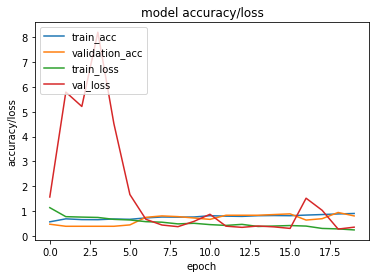

In [207]:
plt.figure(1)
plt.plot(model_try.history['acc'])
plt.plot(model_try.history['val_acc'])
plt.plot(model_try.history['loss'])
plt.plot(model_try.history['val_loss'])
plt.title('model accuracy/loss')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['train_acc', 'validation_acc','train_loss', 'val_loss'], loc='upper left')